# Importing Main Libraries

In [1]:
## Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Preprocessing
from datasist.structdata import detect_outliers

In [2]:
## Load DataSet
df=pd.read_csv('../New folder/Airbnb_Open_Data.csv')
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [3]:
#Check Duplicates
df.duplicated().sum()

np.int64(541)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
## Check Null Values
df.isna().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
## Some Info About The DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102058 non-null  int64  
 1   NAME                            101808 non-null  object 
 2   host id                         102058 non-null  int64  
 3   host_identity_verified          101769 non-null  object 
 4   host name                       101654 non-null  object 
 5   neighbourhood group             102029 non-null  object 
 6   neighbourhood                   102042 non-null  object 
 7   lat                             102050 non-null  float64
 8   long                            102050 non-null  float64
 9   country                         101526 non-null  object 
 10  country code                    101927 non-null  object 
 11  instant_bookable                101953 non-null  object 
 12  cancellation_policy  

# PreProcessing

In [8]:
df.drop(columns=['id','NAME','country','country code','house_rules','license','host id'],inplace=True,axis=1)

In [9]:
df.dropna(subset=['host_identity_verified','host name','neighbourhood','neighbourhood group','lat','long','cancellation_policy','number of reviews','price','service fee'],inplace=True)

med_fill=['Construction year','reviews per month','review rate number','calculated host listings count','availability 365']
for col in med_fill:
    df[col].fillna(df[col].median(),inplace=True)

mod_fill=['last review']
for col in mod_fill:
    df[col].fillna(df[col].mode()[0],inplace=True)
        
df['instant_bookable'].fillna('True',inplace=True)
df['minimum nights'].fillna(1,inplace=True)



In [10]:
## Fixing Price & Service fee Columns
def fix_x(x):
    x=x.replace('$',"").replace(",","")
    return float(x)

df['price']=df['price'].apply(fix_x)

df['service fee']=df['service fee'].apply(lambda x: x.split('$')[-1])
df['price']=pd.to_numeric(df['price'],errors='coerce')
df['service fee']=pd.to_numeric(df['service fee'],errors='coerce')

In [11]:
## Check Price after fixing
df['price'][1558]

np.float64(643.0)

In [12]:
df.isna().sum()

host_identity_verified            0
host name                         0
neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
last review                       0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [13]:
## Some Statistical Calcs from DataSet
df.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,100600.000000,100600.000000,100600.000000,100600.000000,100600.000000,100600.000000,100600.000000,100600.000000,100600.000000,100600.000000,100600.000000
mean,40.728091,-73.949655,2012.485437,625.259930,125.052684,8.074920,27.466501,1.281776,3.277763,7.932187,140.949523
std,0.055865,0.049506,5.759547,331.701941,66.343652,30.610315,49.505530,1.627328,1.283312,32.332535,135.188875
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,40.688740,-73.982580,2008.000000,340.000000,68.000000,1.000000,1.000000,0.280000,2.000000,1.000000,3.000000
50%,40.722285,-73.954450,2012.000000,624.000000,125.000000,3.000000,7.000000,0.750000,3.000000,1.000000,96.000000
75%,40.762760,-73.932340,2017.000000,913.000000,183.000000,5.000000,30.000000,1.720000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [14]:
## Fixing Negative in Minimum Nights Column
df['minimum nights']=df['minimum nights'].apply(lambda x: abs(x))

In [15]:
df['minimum nights'].max()

np.float64(5645.0)

In [16]:
## In Some Contracts Average Time is 1 Year
df.drop(df[df['minimum nights']>365].index,inplace=True)

In [17]:
## Fixing Negative in Availability 365 Column

df['availability 365']=df['availability 365'].apply(lambda x: abs(x))

In [18]:
## The maximum Average time for listing to be available again is 1.5 year !
df[df['availability 365']>365]

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
5,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,True,flexible,Entire home/apt,2013.0,577.0,115,3.0,74.0,6/22/2019,0.59,3.0,1.0,374.0
9,unconfirmed,Carl,Manhattan,Upper West Side,40.80178,-73.96723,False,strict,Private room,2015.0,291.0,58,2.0,118.0,7/21/2017,0.99,5.0,1.0,375.0
33,unconfirmed,John,Brooklyn,Greenpoint,40.72219,-73.93762,True,moderate,Private room,2007.0,858.0,172,4.0,197.0,6/15/2019,1.65,3.0,3.0,383.0
34,verified,Alfred,Manhattan,Harlem,40.82130,-73.95318,True,strict,Private room,2021.0,545.0,109,3.0,273.0,7/1/2019,2.37,3.0,3.0,411.0
36,verified,Brad,Brooklyn,South Slope,40.66869,-73.98780,True,moderate,Private room,2003.0,1111.0,222,4.0,168.0,6/21/2019,1.41,3.0,3.0,416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86857,verified,Judah,Manhattan,Upper West Side,40.79415,-73.97323,True,flexible,Private room,2019.0,969.0,194,5.0,3.0,6/13/2019,0.08,2.0,1.0,380.0
86858,unconfirmed,Ephraim,Manhattan,Harlem,40.81589,-73.94648,True,flexible,Entire home/apt,2003.0,749.0,150,4.0,125.0,6/20/2019,3.37,4.0,4.0,409.0
86874,unconfirmed,Josh,Manhattan,Upper West Side,40.76986,-73.98673,True,strict,Private room,2018.0,643.0,129,1.0,1.0,8/9/2016,0.03,5.0,1.0,383.0
86875,verified,Chris,Brooklyn,Williamsburg,40.71182,-73.95692,False,moderate,Shared room,2012.0,1139.0,228,1.0,0.0,6/23/2019,0.75,5.0,1.0,379.0


### Handling With Outliers

In [19]:
out_indeces=detect_outliers(df,0,['availability 365'])
out_indeces

[70866]

In [20]:
df.drop(out_indeces,inplace=True)

In [21]:
df.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,100564.000000,100564.000000,100564.000000,100564.000000,100564.000000,100564.000000,100564.000000,100564.000000,100564.000000,100564.000000,100564.000000
mean,40.728090,-73.949653,2012.485382,625.226393,125.045961,7.802066,27.467921,1.281939,3.277923,7.934489,140.940873
std,0.055865,0.049511,5.759640,331.682771,66.339848,16.961893,49.502598,1.627533,1.283317,32.338083,134.680253
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,1.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,40.688740,-73.982580,2008.000000,340.000000,68.000000,1.000000,1.000000,0.280000,2.000000,1.000000,4.000000
50%,40.722285,-73.954450,2012.000000,624.000000,125.000000,3.000000,7.000000,0.750000,3.000000,1.000000,96.000000
75%,40.762760,-73.932340,2017.000000,913.000000,183.000000,5.000000,30.000000,1.720000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,365.000000,1024.000000,90.000000,5.000000,332.000000,426.000000


In [22]:
## Getting The indeces of listings with zero review !
## it doesn't make any sence of having zero review and a number in reviews per month !
zero_reviews=df[df['number of reviews']==0].index
df.loc[zero_reviews,'reviews per month']=0

In [23]:
df[df['number of reviews']==0].head()

,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
20,verified,Audrey,Manhattan,East Harlem,40.79685,-73.94872,True,moderate,Entire home/apt,2013.0,281.0,56,7.0,0.0,6/23/2019,0.0,3.0,2.0,347.0
27,verified,Adrianna,Manhattan,Inwood,40.86754,-73.92639,True,strict,Private room,2017.0,274.0,55,4.0,0.0,6/23/2019,0.0,3.0,1.0,96.0
37,verified,Arthur,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,False,moderate,Private room,2004.0,203.0,41,60.0,0.0,6/23/2019,0.0,3.0,1.0,294.0
39,verified,Deanna,Brooklyn,Flatbush,40.63702,-73.96327,True,strict,Private room,2011.0,1020.0,204,1.0,0.0,6/23/2019,0.0,3.0,1.0,356.0
261,verified,Foster,Bronx,Clason Point,40.81309,-73.85514,True,moderate,Private room,2005.0,643.0,129,2.0,0.0,6/23/2019,0.0,1.0,7.0,96.0


In [24]:
## Removing Wrong named neighbourhood group
df[df['neighbourhood group']=='brookln' ].index 

Index([13], dtype='int64')

In [25]:
wrong_neighbourhood_group=np.array([13])
df.drop(labels=wrong_neighbourhood_group,axis=0,inplace=True)

# UniVirate Visualization

## Distribution of Prices in DataSet

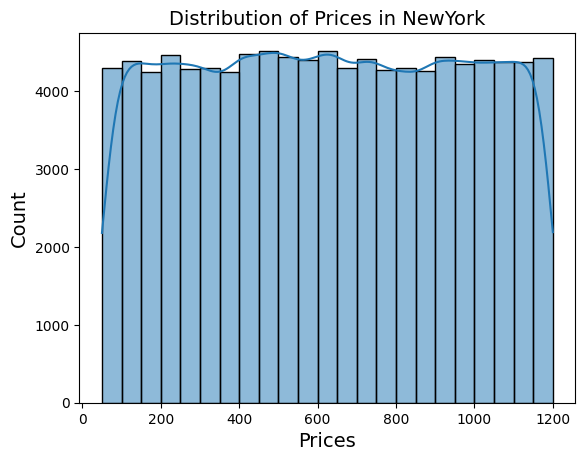

In [26]:
sns.histplot(x='price',data=df,bins=23,kde=True)
plt.title('Distribution of Prices in NewYork',fontsize=14,color='k')
plt.xlabel('Prices',fontsize=14,color='k')
plt.ylabel('Count',fontsize=14,color='k')
plt.show()

## Relation Betwwen Prices and Service fee

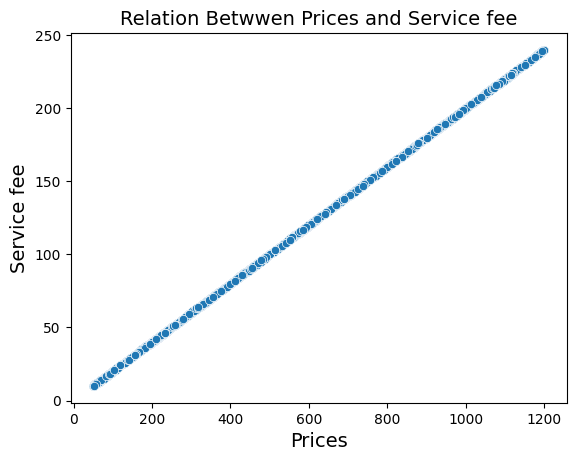

In [27]:
sns.scatterplot(x='price',y='service fee',data=df)
plt.title('Relation Betwwen Prices and Service fee',fontsize=14,color='k')
plt.xlabel('Prices',fontsize=14,color='k')
plt.ylabel('Service fee',fontsize=14,color='k')
plt.show()

## What is The Average Prices Per Neighbourhood Group?

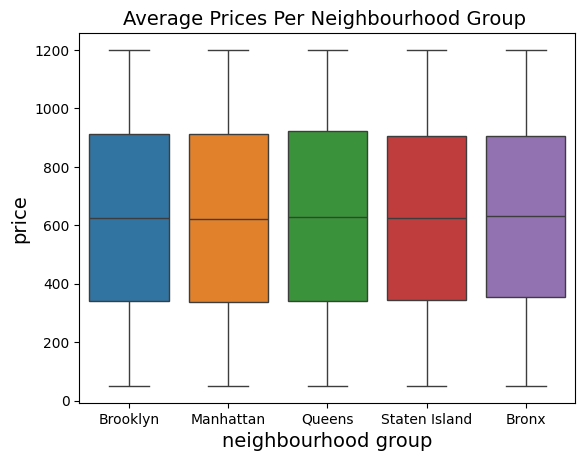

In [28]:
sns.boxplot(y='price',x='neighbourhood group',data=df,hue='neighbourhood group')
plt.title('Average Prices Per Neighbourhood Group ',fontsize=14,color='k')
plt.xlabel('neighbourhood group',fontsize=14,color='k')
plt.ylabel('price',fontsize=14,color='k')
plt.show()

## Top & Cheapest 10 Neighbourhoods in AVG Prices

In [29]:
top_10_N_AP=pd.DataFrame(df.groupby('neighbourhood').price.mean().sort_values(ascending=False)[:10])
cheapest_10_N_AP=pd.DataFrame(df.groupby('neighbourhood').price.mean().sort_values(ascending=True)[:10])


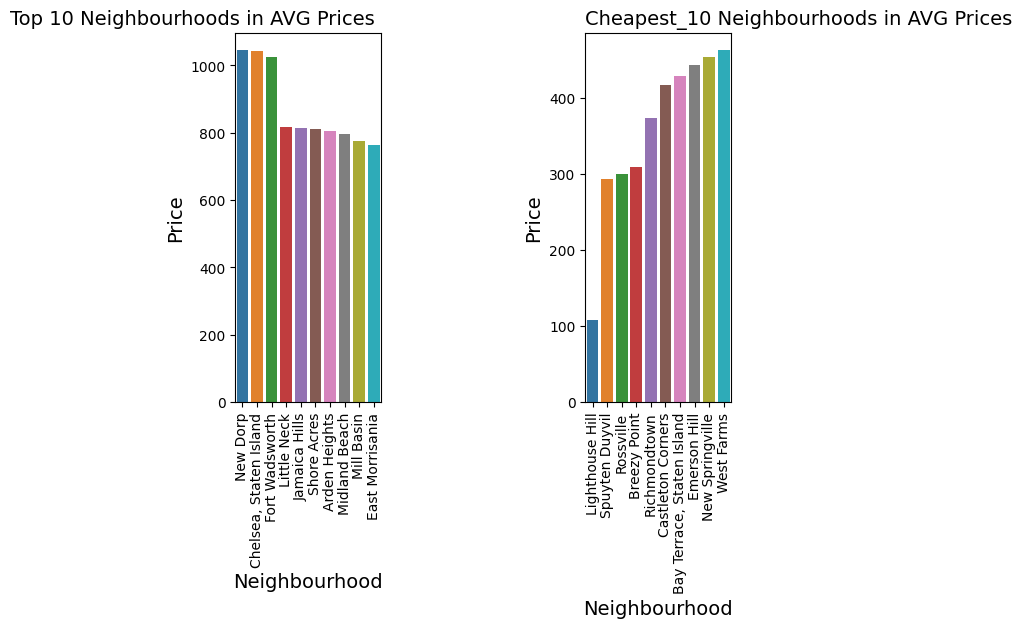

In [30]:
plt.subplot(1,3,1)
sns.barplot(x='neighbourhood',y='price',data=top_10_N_AP,estimator=np.mean,hue='neighbourhood')
plt.title('Top 10 Neighbourhoods in AVG Prices ',fontsize=14,color='k',loc='right')
plt.xlabel('Neighbourhood',fontsize=14,color='k')
plt.xticks(rotation=90)
plt.ylabel('Price',fontsize=14,color='k')

plt.subplot(1,3,3)
sns.barplot(x='neighbourhood',y='price',data=cheapest_10_N_AP,estimator=np.mean,hue='neighbourhood')
plt.title('Cheapest_10 Neighbourhoods in AVG Prices ',fontsize=14,color='k',loc='left')
plt.xlabel('Neighbourhood',fontsize=14,color='k')
plt.xticks(rotation=90)
plt.ylabel('Price',fontsize=14,color='k')
plt.show()

## Most Frequent 15 Neighbourhood

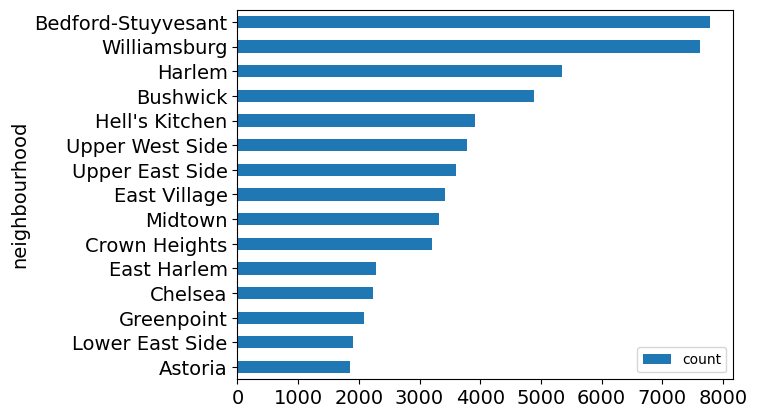

In [31]:
 n_count=pd.DataFrame(df['neighbourhood'].value_counts()[:15].sort_values(ascending=True))
n_count.plot(kind='barh',fontsize=14)
plt.ylabel('neighbourhood',fontsize=14,color='k')
plt.show()

## Average Prices Per Construction Year

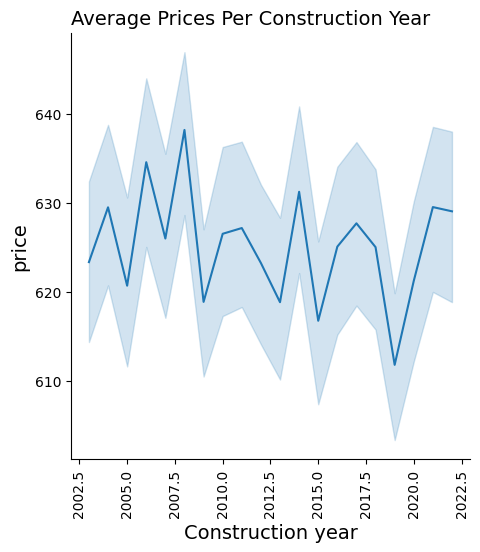

In [32]:
sns.relplot(x='Construction year',y='price',kind='line',data=df)
plt.title('Average Prices Per Construction Year ',fontsize=14,color='k',loc='left')
plt.xlabel('Construction year',fontsize=14,color='k')
plt.xticks(rotation=90)
plt.ylabel('price',fontsize=14,color='k')
plt.show()

## Neighbourhood Group Distribution

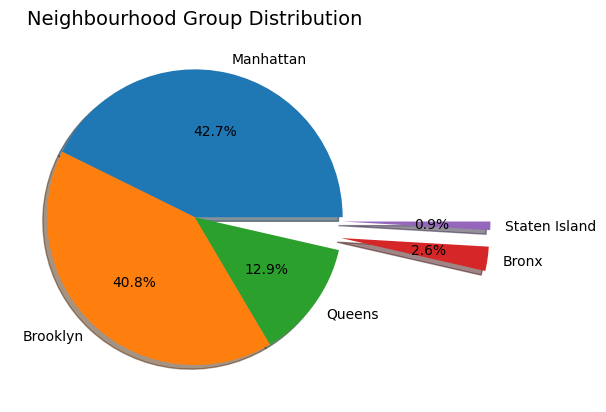

In [33]:
df['neighbourhood group'].value_counts()
ng_dist=pd.DataFrame(df['neighbourhood group'].value_counts())

fig,ax=plt.subplots()
ax.pie(ng_dist.values.squeeze(),labels=ng_dist.index,autopct="%1.1f%%",shadow=True,explode=(0,0,0,1,1));
plt.title('Neighbourhood Group Distribution',fontsize=14,color='k')
plt.show()

## Total Income Of Neighbourhood Group Per Night

In [34]:
income_NG_night=pd.DataFrame(df.groupby('neighbourhood group').price.agg('sum')).sort_values('price',ascending=False)
income_NG_night

,price
neighbourhood group,
Manhattan,26744431.0
Brooklyn,25688703.0
Queens,8191218.0
Bronx,1670038.0
Staten Island,580297.0


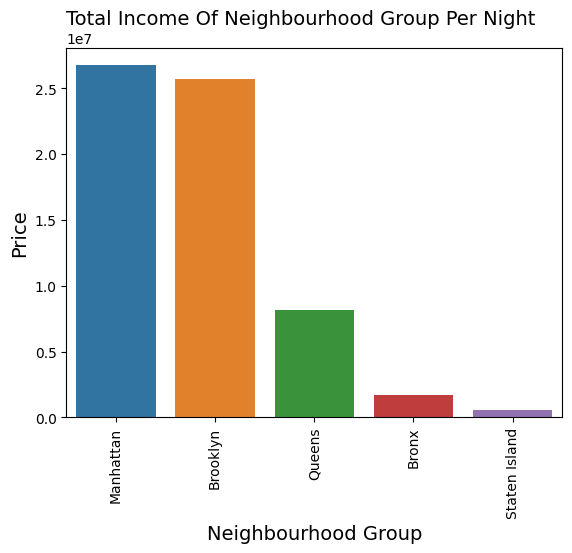

In [35]:
sns.barplot(x='neighbourhood group',y='price',data=income_NG_night,estimator=np.sum,hue='neighbourhood group')
plt.title('Total Income Of Neighbourhood Group Per Night ',fontsize=14,color='k',loc='left')
plt.xlabel('Neighbourhood Group',fontsize=14,color='k')
plt.xticks(rotation=90)
plt.ylabel('Price',fontsize=14,color='k')
plt.show()

## Distribution & AVG Price Of Room Type

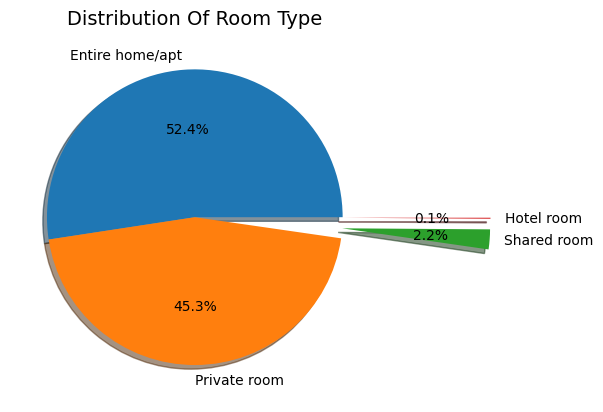

In [36]:
fig,ax=plt.subplots()
ax.pie(df['room type'].value_counts().values.squeeze(),labels=df['room type'].value_counts().index,autopct='%1.1f%%',shadow=True,explode=(0,0,1,1))
plt.title('Distribution Of Room Type',fontsize=14,color='k',loc='center')
plt.show()


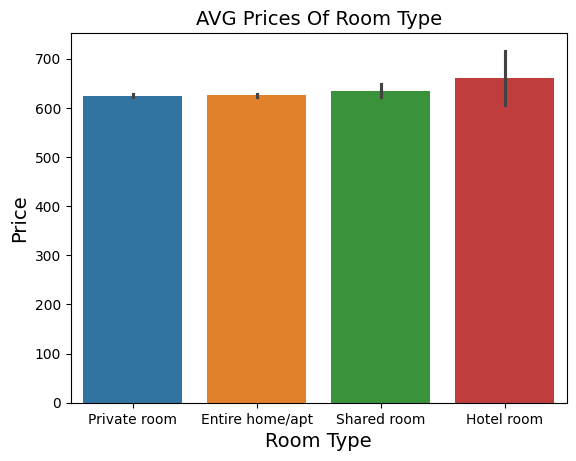

In [37]:
sns.barplot(x='room type',y='price',data=df,estimator=np.mean,hue='room type')
plt.title('AVG Prices Of Room Type',fontsize=14,color='k')
plt.xlabel('Room Type',fontsize=14,color='k')
plt.ylabel('Price',fontsize=14,color='k')
plt.show()

## Reviews VS Price 

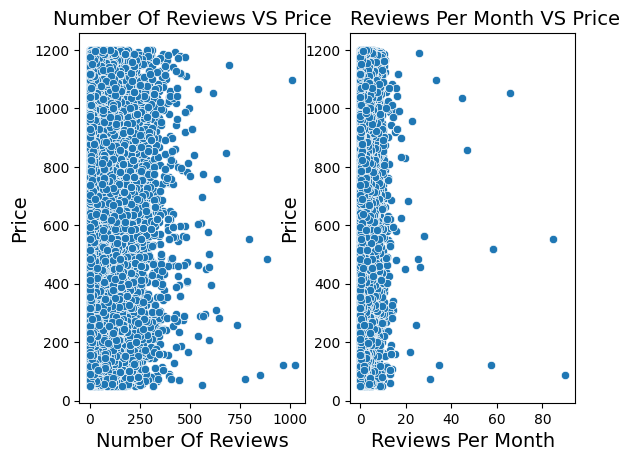

In [38]:
plt.subplot(1,2,1)
sns.scatterplot(x=df['number of reviews'],y=df['price'],data=df)
plt.title('Number Of Reviews VS Price',fontsize=14,color='k')
plt.xlabel('Number Of Reviews',fontsize=14,color='k')
plt.ylabel('Price',fontsize=14,color='k')

plt.subplot(1,2,2)
sns.scatterplot(x=df['reviews per month'],y=df['price'],data=df)
plt.title('Reviews Per Month VS Price',fontsize=14,color='k',loc='left')
plt.xlabel('Reviews Per Month',fontsize=14,color='k')
plt.ylabel('Price',fontsize=14,color='k')


plt.show()

## What is The Listing Count of Top 10 Host on Airnpn ?

In [39]:
top_10_host=pd.DataFrame(df.groupby('host name')['calculated host listings count'].agg('count').sort_values(ascending=False)[:10])
top_10_host

,calculated host listings count
host name,
Michael,870
David,752
John,569
Alex,541
Sonder (NYC),513
Daniel,466
Karen,432
Sarah,423
Maria,412


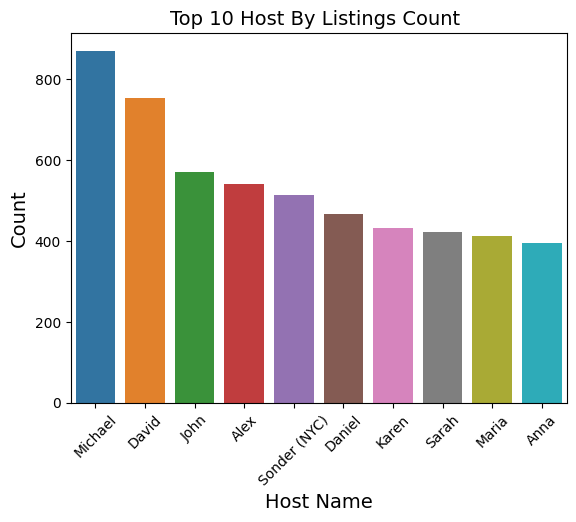

In [40]:
sns.barplot(x='host name',y='calculated host listings count',data=top_10_host,hue='host name')
plt.title('Top 10 Host By Listings Count ',fontsize=14,color='k')
plt.xlabel('Host Name',fontsize=14,color='k')
plt.xticks(rotation=45)
plt.ylabel('Count',fontsize=14,color='k')
plt.show()

# BiVirate Visualization

## AVG Prices in Each neighbourhood Group By Cancellation Ppolicy

Text(51.74669020061728, 0.5, 'Price')

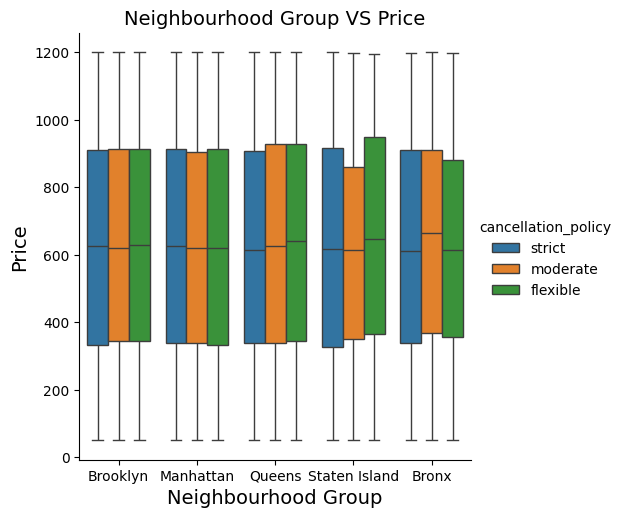

In [41]:
sns.catplot(x='neighbourhood group',y='price',hue='cancellation_policy',data=df,kind='box')
plt.title('Neighbourhood Group VS Price',fontsize=14,color='k')
plt.xlabel('Neighbourhood Group',fontsize=14,color='k')
plt.ylabel('Price',fontsize=14,color='k')

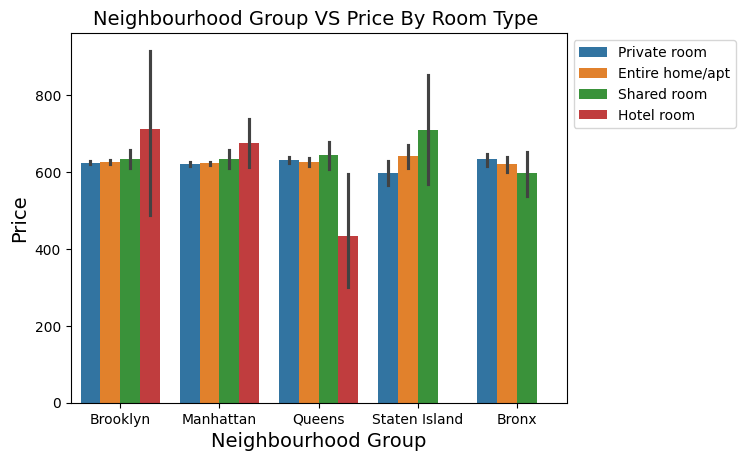

In [42]:
sns.barplot(x='neighbourhood group' , y='price',data=df,hue='room type')
plt.title('Neighbourhood Group VS Price By Room Type ',fontsize=14,color='k')
plt.xlabel('Neighbourhood Group',fontsize=14,color='k')
plt.ylabel('Price',fontsize=14,color='k')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()

## AVG Prices Vs Construction Year By Neighbourhood Group

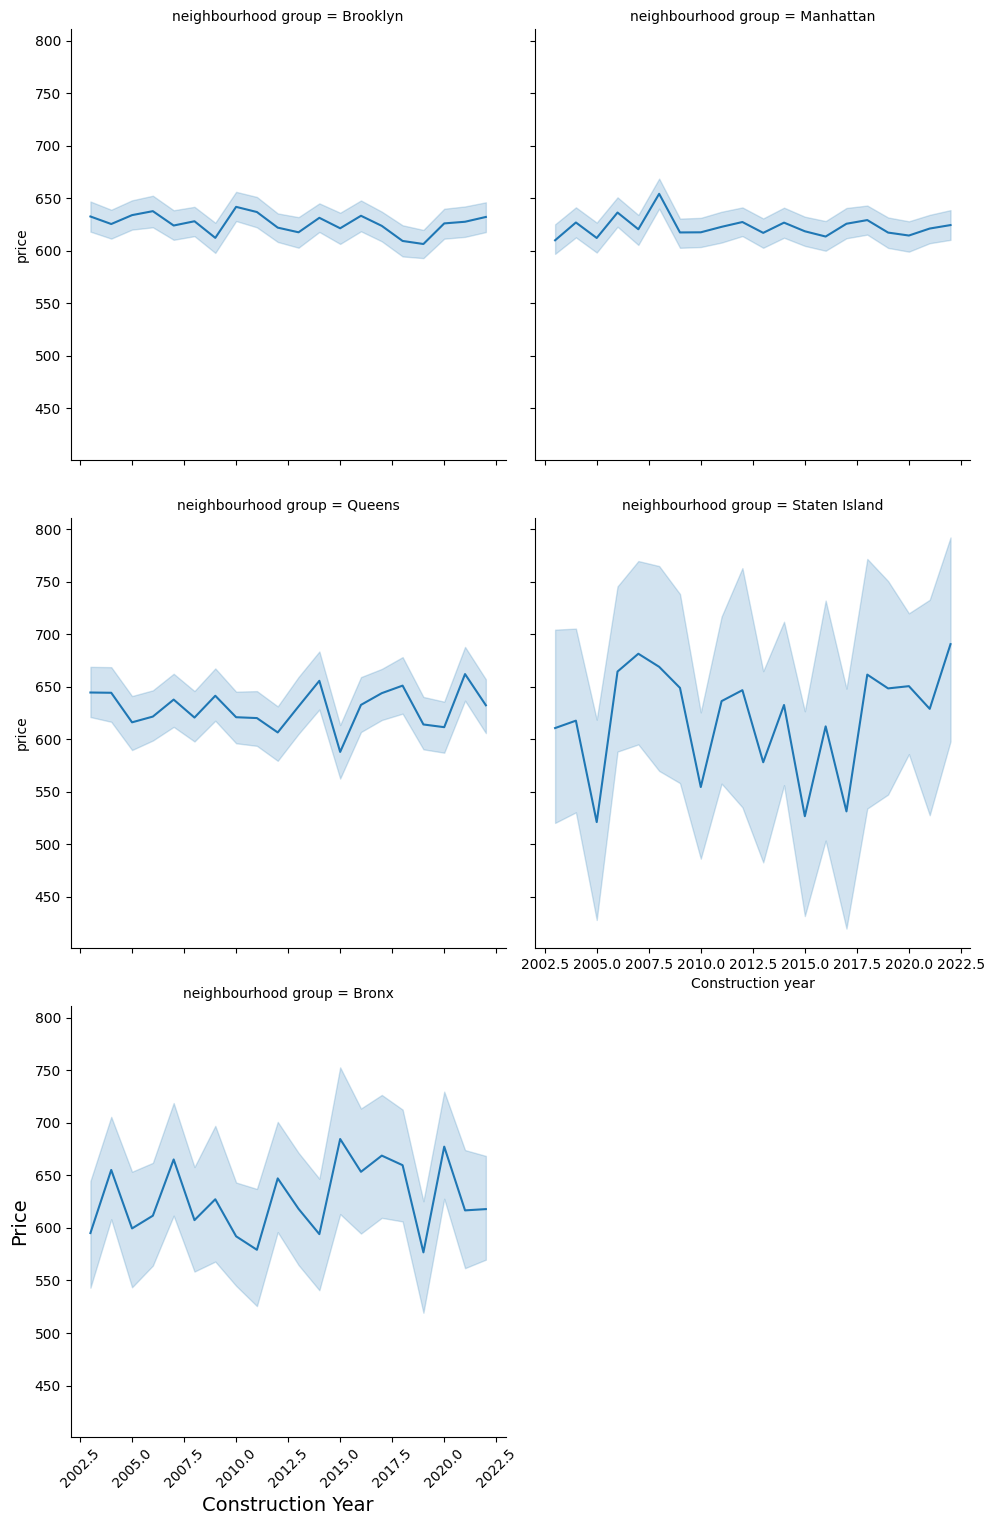

In [43]:
sns.relplot(x='Construction year',y='price',data=df,col='neighbourhood group',col_wrap=2,kind='line')
plt.xlabel('Construction Year',fontsize=14,color='k')
plt.xticks(rotation=45)
plt.ylabel('Price',fontsize=14,color='k')
plt.show()

## Number Of Reviews VS Reviews Per Month By Room Type

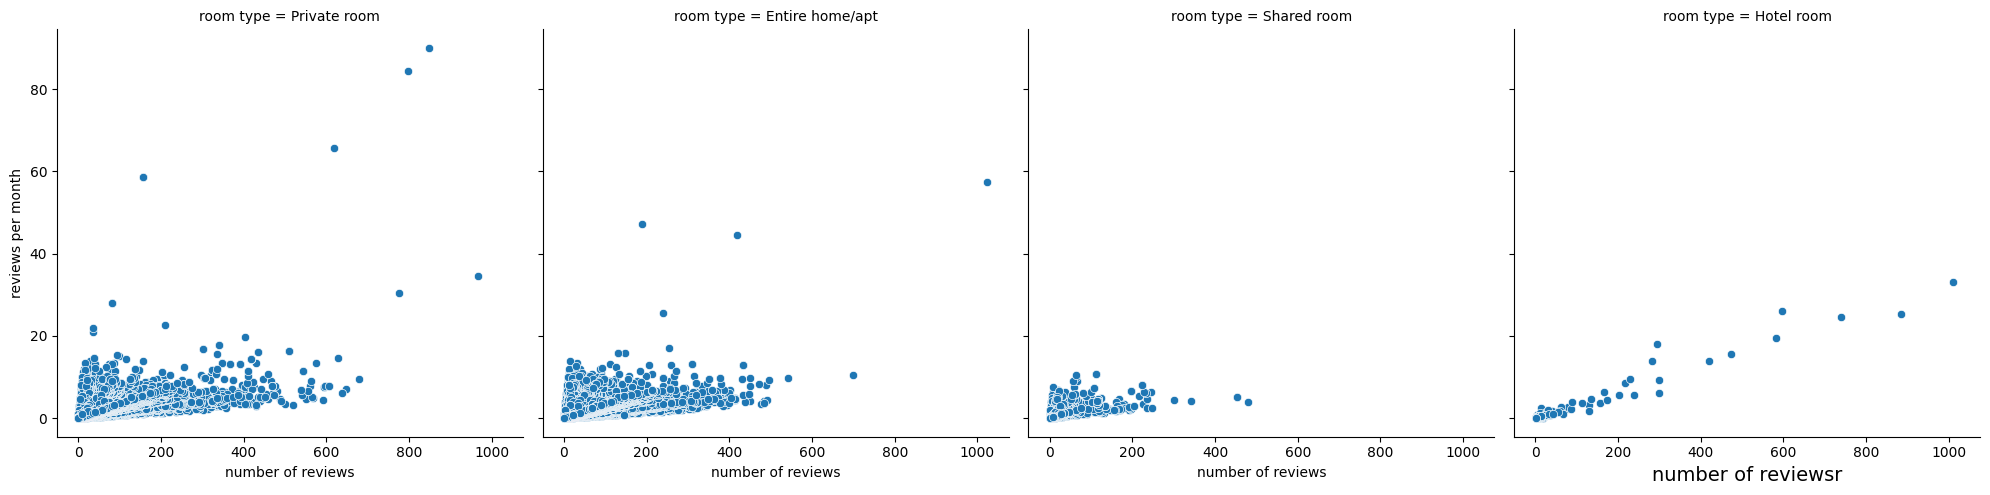

In [44]:
sns.relplot(x='number of reviews',y='reviews per month',data=df,col='room type',col_wrap=4)
plt.xlabel('number of reviewsr',fontsize=14,color='k')
plt.ylabel('reviews per month',fontsize=14,color='k')
plt.show()

# MultiVirate Visualization

## AVG Room Type Prices By Cancellation Policy in Each Neighbourhood Group

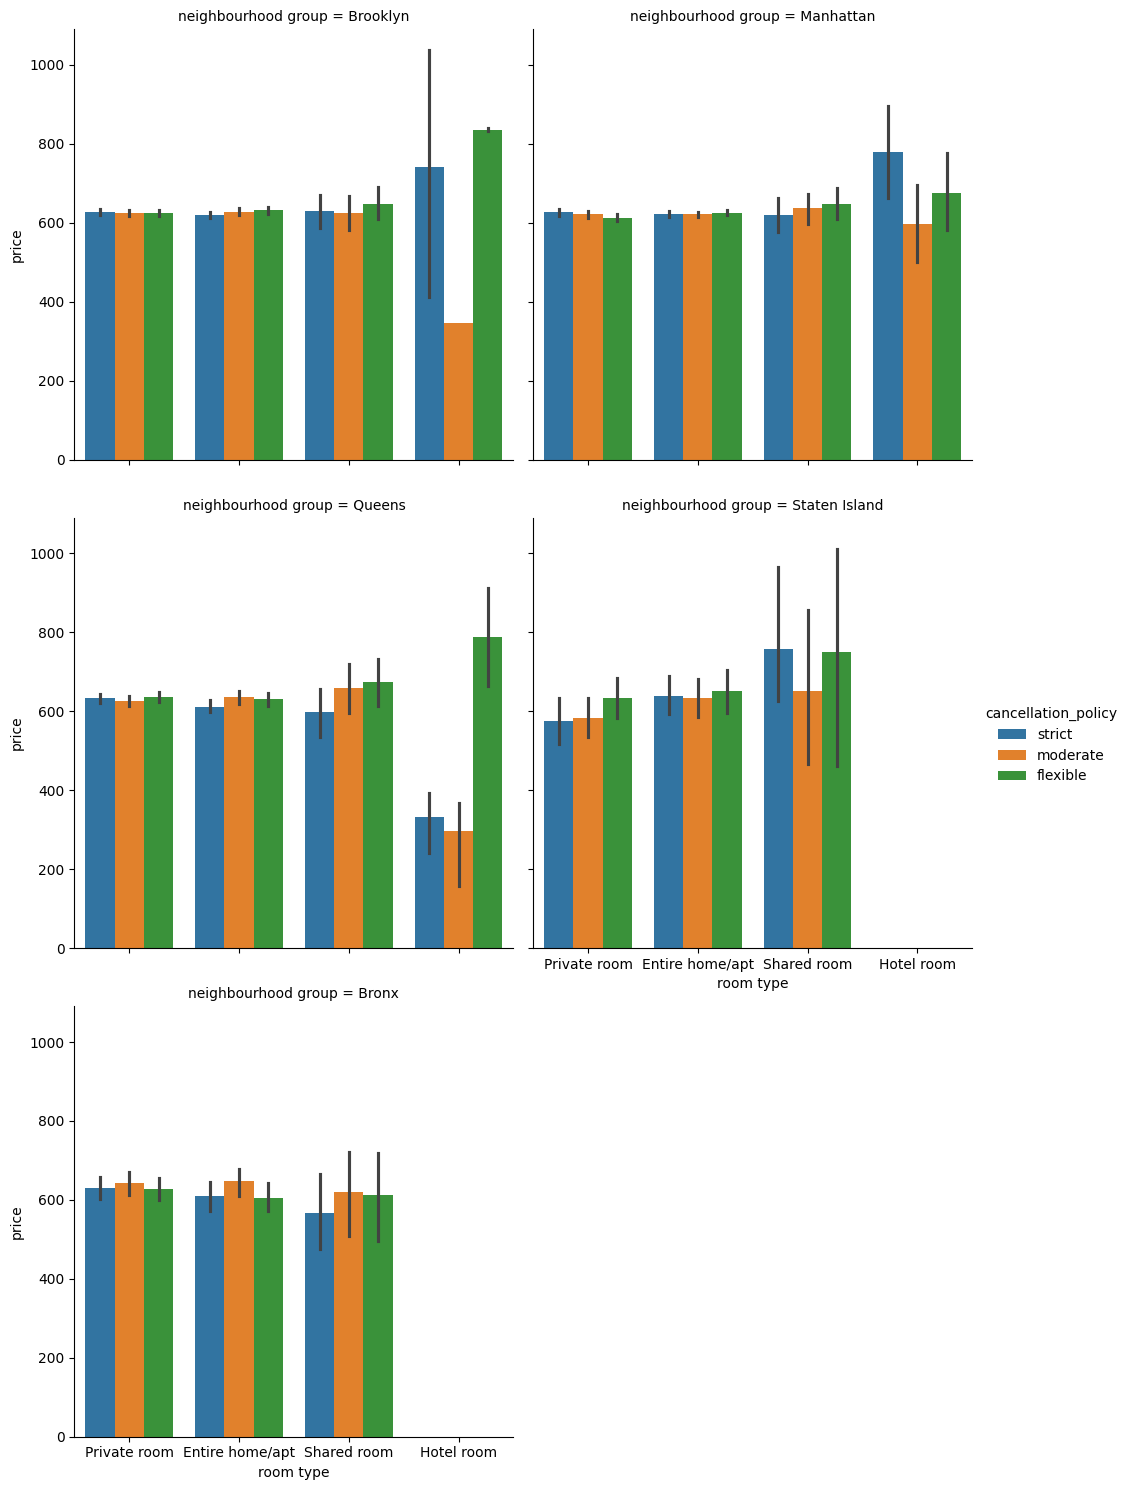

In [45]:
sns.catplot(x='room type',y='price',data=df,hue='cancellation_policy',col='neighbourhood group',col_wrap=2,kind='bar')
plt.show()

## AVG Prices Vs Construction Year By Room Type in Each Neighbourhood Group

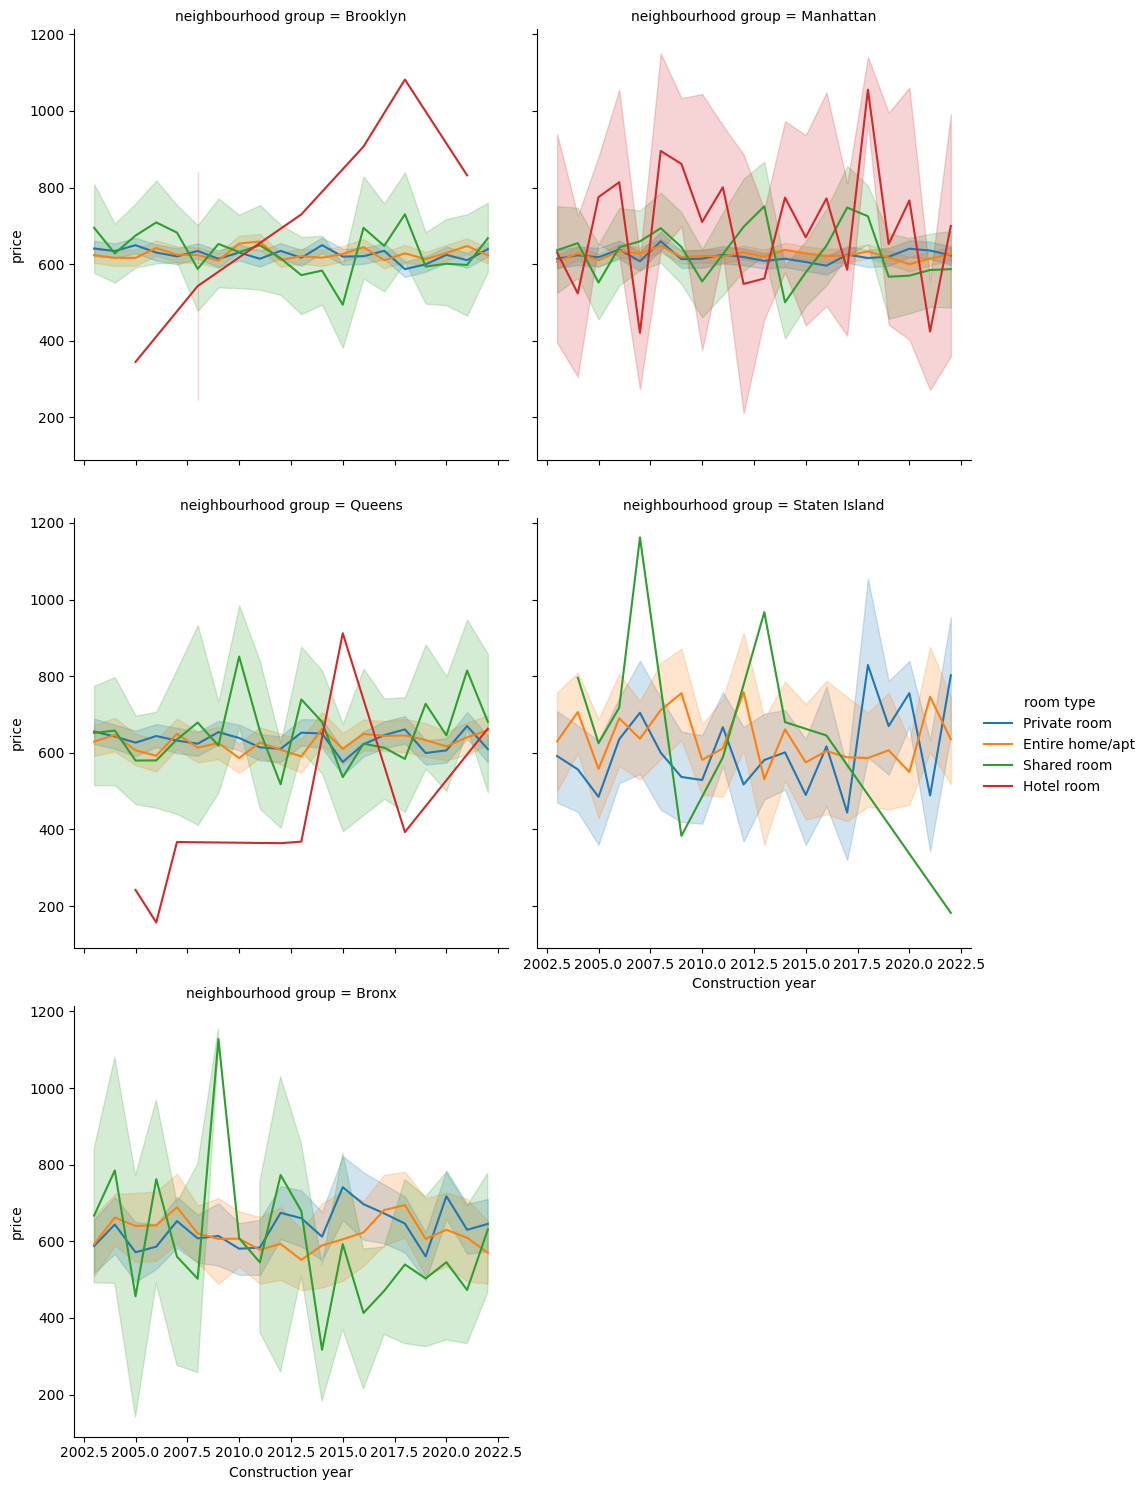

In [46]:
sns.relplot(x='Construction year',y='price',data=df,col='neighbourhood group',col_wrap=2,kind='line',hue='room type')
plt.show()

## Location oF Listings

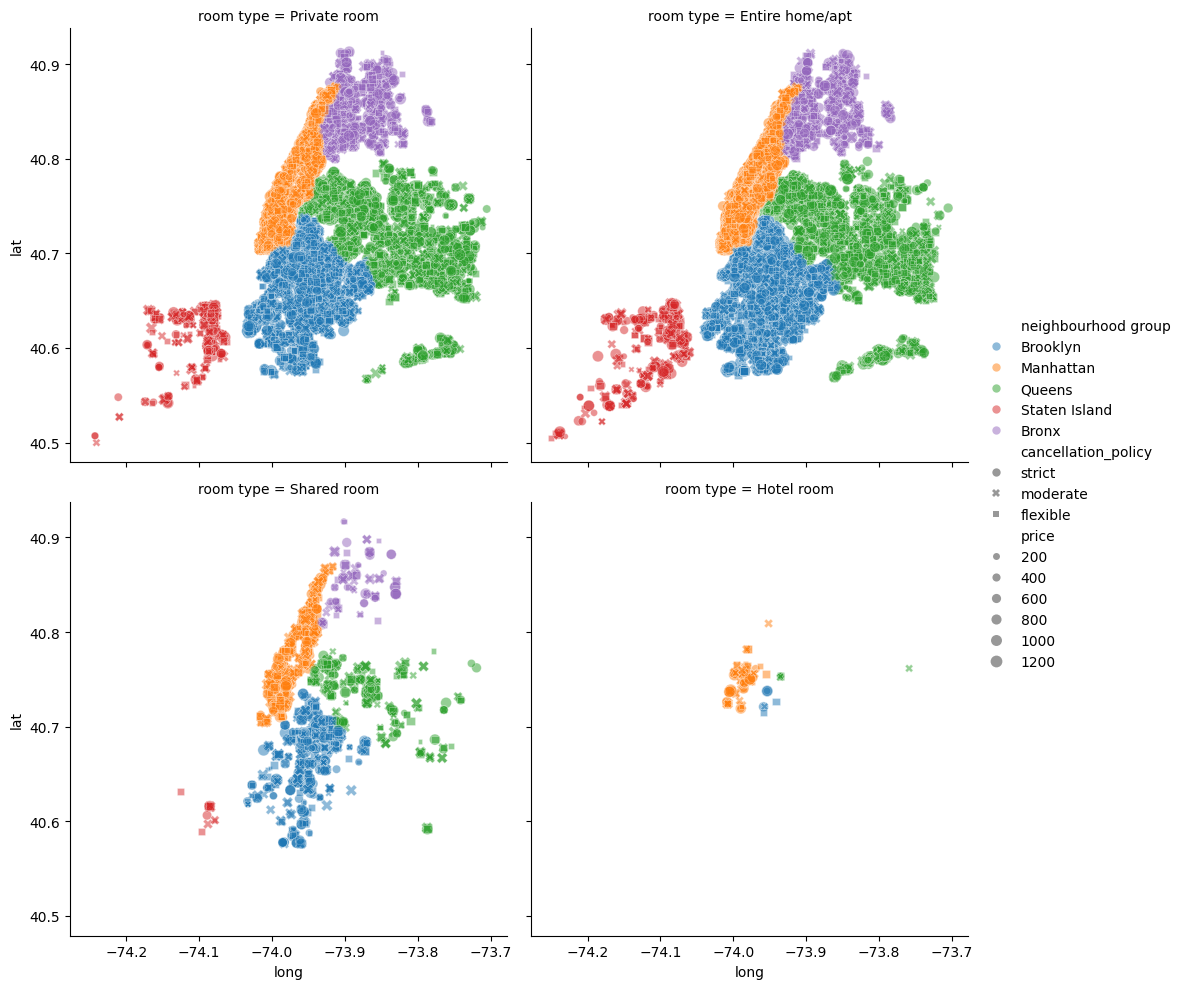

In [47]:
sns.relplot(x='long',y='lat',data=df,size=df['price'],style='cancellation_policy',alpha=0.5,hue='neighbourhood group',col='room type',col_wrap=2)
plt.show()